# AI Chess player

In [14]:
import chess
import chess.svg
from time import sleep
import matplotlib.pyplot as plt

In [15]:
BOARD_SCORES = {
    "PAWN": 1,
    "BISHOP": 4,
    "KING": 0,
    "QUEEN": 10,
    "KNIGHT": 5,
    "ROOK": 3
}

END_SCORES = {
    "WIN": 100,
    "LOSE": -100,
    "TIE": 0,
}

PIECES = {
    1: "PAWN",
    2: "KNIGHT",
    3: "BISHOP",
    4: "ROOK",
    5: "QUEEN",
    6: "KING"
}

In [16]:
opening_moves = [
    chess.Move.from_uci("e2e4"),
    chess.Move.from_uci("d2d4"),
    chess.Move.from_uci("g1f3"),
    chess.Move.from_uci("c2c4"),
]

In [17]:
def evaluate(board):
    score = 0
    for piece in board.piece_map().values():
        if piece.color:
            score += BOARD_SCORES[PIECES[piece.piece_type]]
        else:
            score -= BOARD_SCORES[PIECES[piece.piece_type]]

    if board.is_checkmate():
        if board.turn:
            score += END_SCORES["LOSE"]
        else:
            score += END_SCORES["WIN"]
    elif board.is_stalemate():
        score += END_SCORES["TIE"]
    return score

In [18]:
def minimax_alpha_beta(board, depth, alpha, beta, is_maximizing):
    if depth == 0 or board.is_game_over():
        return evaluate(board)
    
    if is_maximizing:
        max_eval = float('-inf')
        for move in board.legal_moves:
            board.push(move)
            eval_score = minimax_alpha_beta(board, depth - 1, alpha, beta, False)
            board.pop()
            if eval_score is not None:
                max_eval = max(max_eval, eval_score)
                alpha = max(alpha, eval_score)
                if beta <= alpha:
                    break
        return max_eval
    else:
        min_eval = float('inf')
        for move in board.legal_moves:
            board.push(move)
            eval_score = minimax_alpha_beta(board, depth - 1, alpha, beta, True)
            board.pop()
            if eval_score is not None:
                min_eval = min(min_eval, eval_score)
                beta = min(beta, eval_score)
                if beta <= alpha:
                    break
        return min_eval

In [19]:
def get_best_move(board, depth):
    best_eval = float('-inf')
    best_move = None
    alpha = float('-inf')
    beta = float('inf')
    for move in board.legal_moves:
        board.push(move)
        eval_score = minimax_alpha_beta(board, depth - 1, alpha, beta, False)
        board.pop()
        if eval_score is not None:
            if eval_score > best_eval:
                best_eval = eval_score
                best_move = move
    return best_move

def print_board(board):
    board_str = str(board)
    board_list = board_str.split("\n")
    plt.clf()
    
    plt.text(0.1, 1, '  |a b c d e f g h', fontsize=20, fontname="monospace")
    plt.text(0.1, 0.9, '8 |' + board_list[0], fontsize=20, fontname="monospace")
    plt.text(0.1, 0.8, '7 |' + board_list[1], fontsize=20, fontname="monospace")
    plt.text(0.1, 0.7, '6 |' + board_list[2], fontsize=20, fontname="monospace")
    plt.text(0.1, 0.6, '5 |' + board_list[3], fontsize=20, fontname="monospace")
    plt.text(0.1, 0.5, '4 |' + board_list[4], fontsize=20, fontname="monospace")
    plt.text(0.1, 0.4, '3 |' + board_list[5], fontsize=20, fontname="monospace")
    plt.text(0.1, 0.3, '2 |' + board_list[6], fontsize=20, fontname="monospace")
    plt.text(0.1, 0.2, '1 |' + board_list[7], fontsize=20, fontname="monospace")
    plt.axis("off")

    plt.savefig("board.png")
    plt.show()
    sleep(0.5)

def play_chess_gui():
    board = chess.Board()

    if board.turn == chess.WHITE:
        move = opening_moves[0]
        board.push(move)

    print(board)

    while not board.is_game_over():
        if board.turn == chess.WHITE:
            depth = 5
            move = get_best_move(board, depth)
            print("Computer move: ", move)
            board.push(move)
        else:
            user_input = input("Your move: ")
            while chess.Move.from_uci(user_input) not in board.legal_moves:
                user_input = input("Invalid move. Your move: ")
            while board.piece_at(chess.Move.from_uci(user_input).from_square).color == chess.WHITE:
                user_input = input("Invalid move. Your move: ")
            
            move = chess.Move.from_uci(user_input)
            board.push(move)
        # print(board)
        print_board(board)
        
    print("Game over. Result: ", board.result())

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


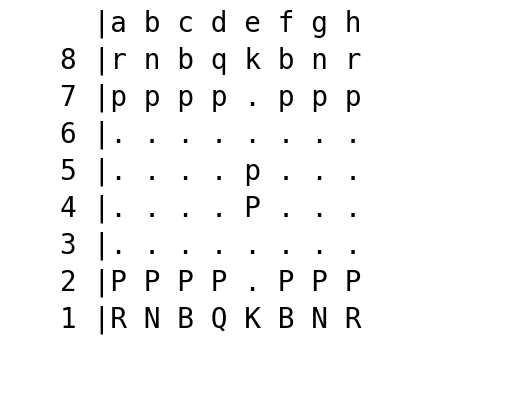

Computer move:  g1f3
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R


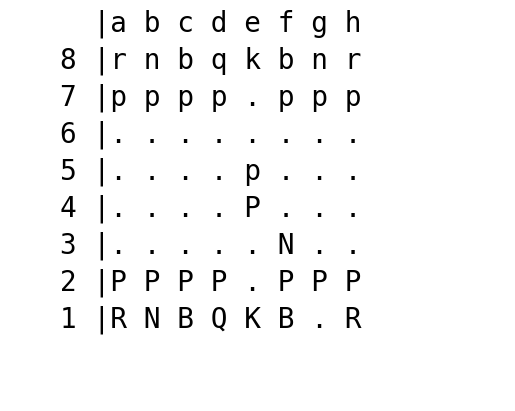

r . b q k b n r
p p p p . p p p
. . n . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R


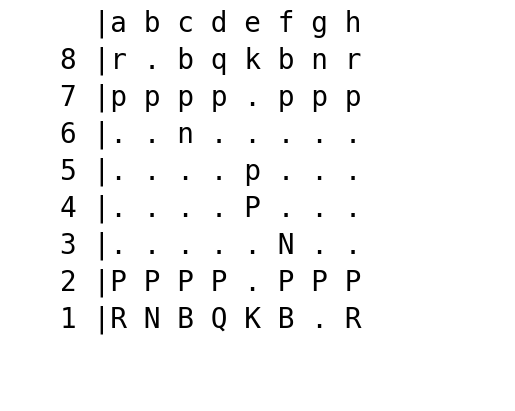

Computer move:  f1b5
r . b q k b n r
p p p p . p p p
. . n . . . . .
. B . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R


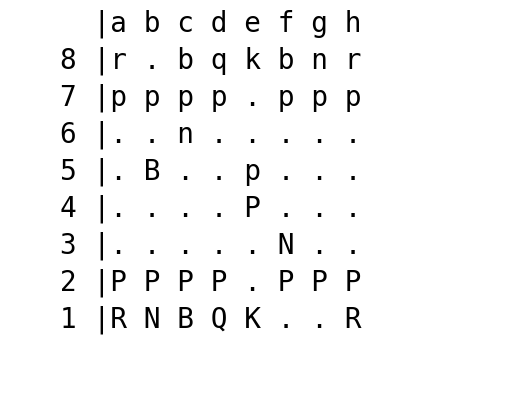

r . b . k b n r
p p p p . p p p
. . n . . q . .
. B . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R


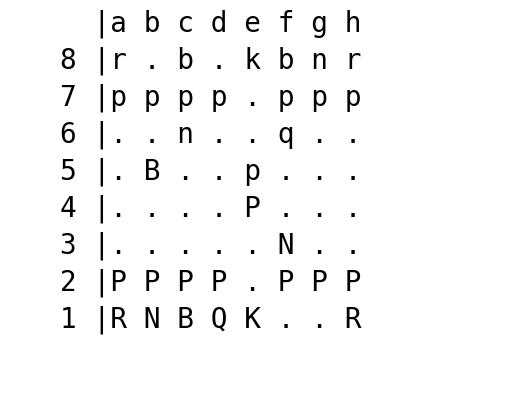

Computer move:  b5c6
r . b . k b n r
p p p p . p p p
. . B . . q . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R


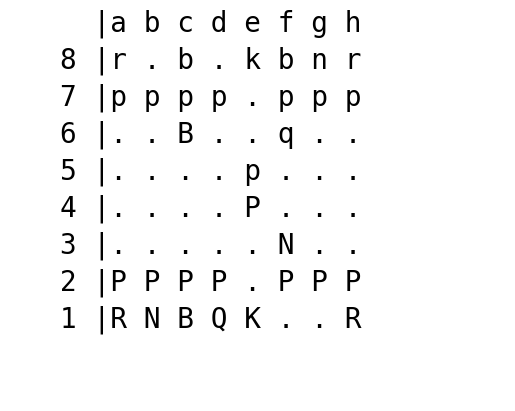

r . b . k . n r
p p p p . p p p
. . B . . q . .
. . b . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R


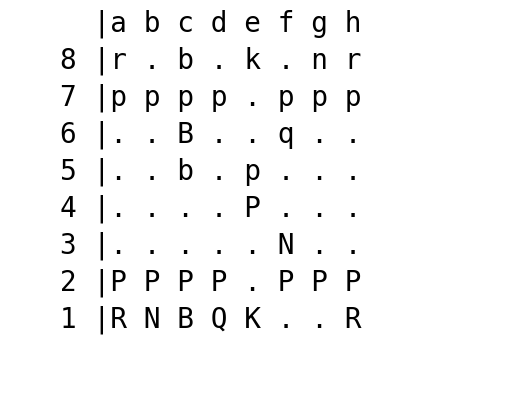

Computer move:  c6d5
r . b . k . n r
p p p p . p p p
. . . . . q . .
. . b B p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R


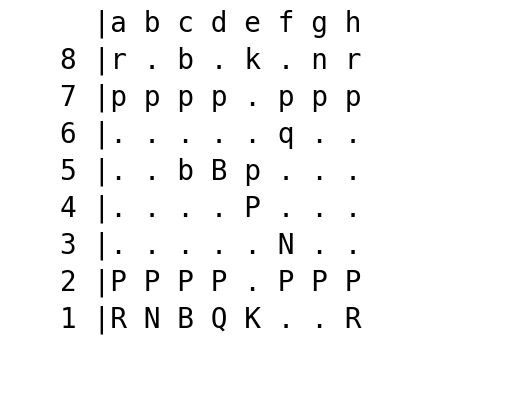

r . b . k . n r
p p p p . p . p
. . . . . q . .
. . b B p . p .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K . . R


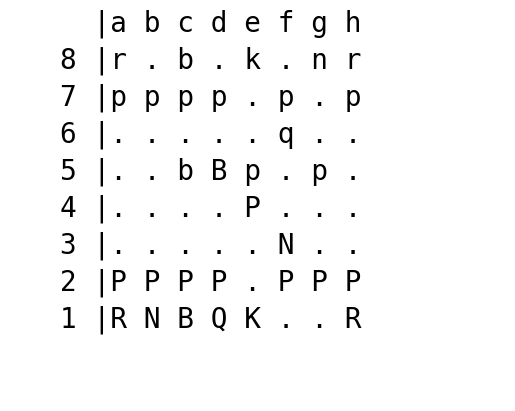

Computer move:  h1f1
r . b . k . n r
p p p p . p . p
. . . . . q . .
. . b B p . p .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K R . .


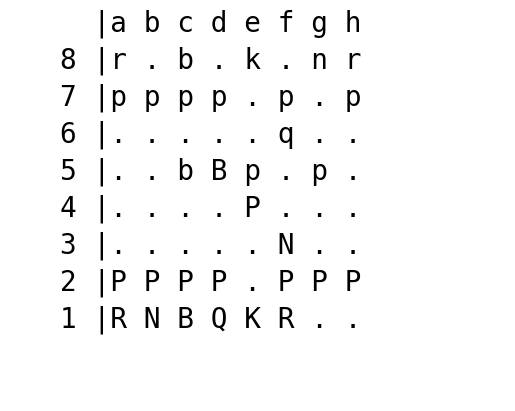

r . b . k . n r
p . p p . p . p
. p . . . q . .
. . b B p . p .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K R . .


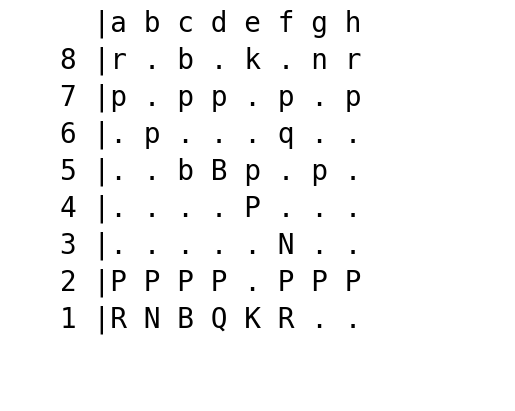

Computer move:  d5a8
B . b . k . n r
p . p p . p . p
. p . . . q . .
. . b . p . p .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K R . .


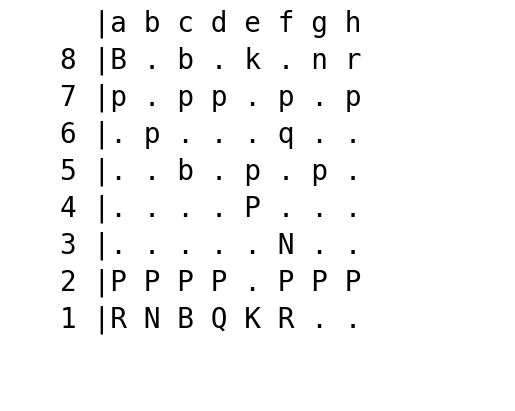

B . . . k . n r
p . p p . p . p
b p . . . q . .
. . b . p . p .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K R . .


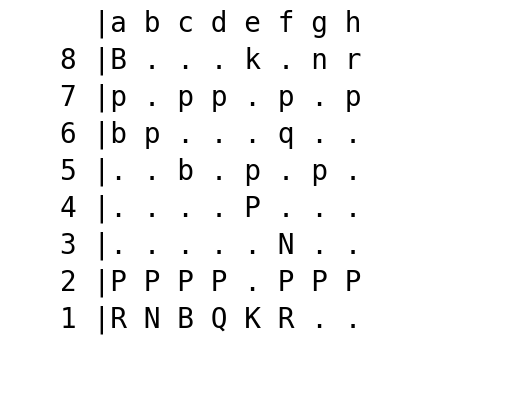

Computer move:  a8d5
. . . . k . n r
p . p p . p . p
b p . . . q . .
. . b B p . p .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K R . .


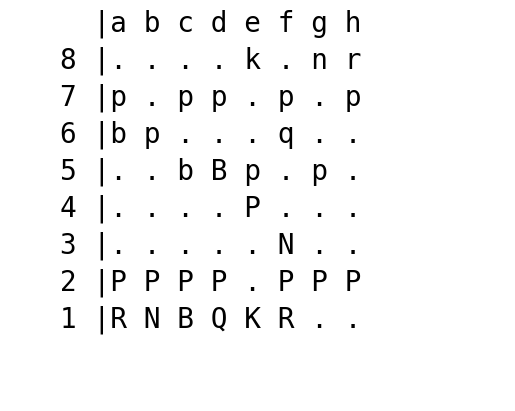

. . . . k . n r
p . p p . p . p
. p . . . q . .
. . b B p . p .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K b . .


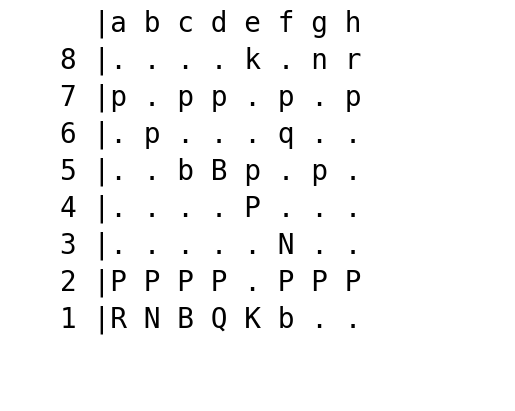

Computer move:  e1f1
. . . . k . n r
p . p p . p . p
. p . . . q . .
. . b B p . p .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q . K . .


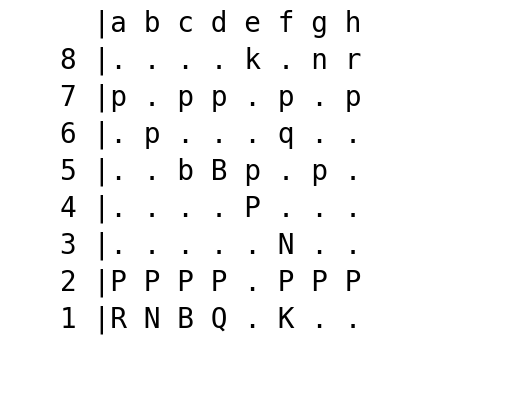

. . . . k . n r
p . p p . p . p
. p . . . q . .
. . b B p . . .
. . . . P . p .
. . . . . N . .
P P P P . P P P
R N B Q . K . .


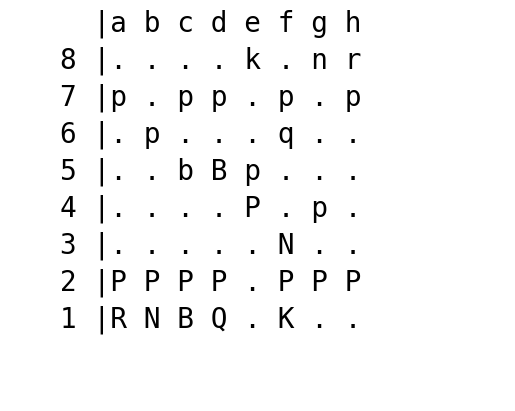

Computer move:  d2d4
. . . . k . n r
p . p p . p . p
. p . . . q . .
. . b B p . . .
. . . P P . p .
. . . . . N . .
P P P . . P P P
R N B Q . K . .


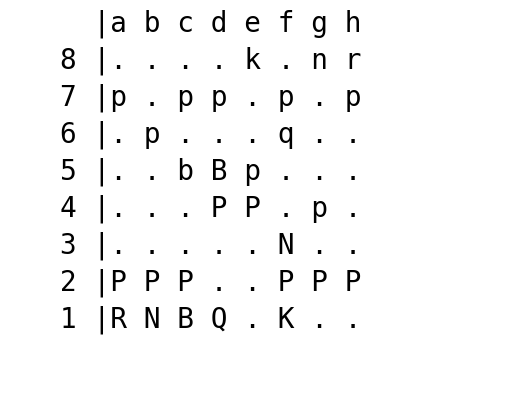

. . . . k . n r
p . p p . p . p
. p . . . q . .
. . b B . . . .
. . . p P . p .
. . . . . N . .
P P P . . P P P
R N B Q . K . .


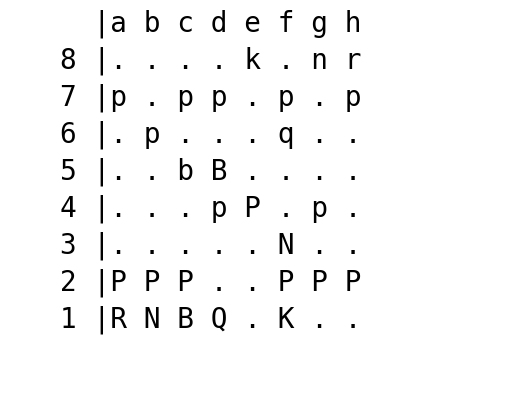

Computer move:  f3g5
. . . . k . n r
p . p p . p . p
. p . . . q . .
. . b B . . N .
. . . p P . p .
. . . . . . . .
P P P . . P P P
R N B Q . K . .


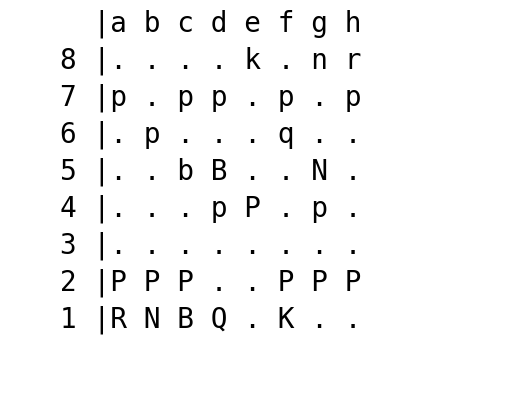

. . . . k . n r
p . p p . p . p
. p . . . q . .
. . b B . . N .
. . . . P . p .
. . . p . . . .
P P P . . P P P
R N B Q . K . .


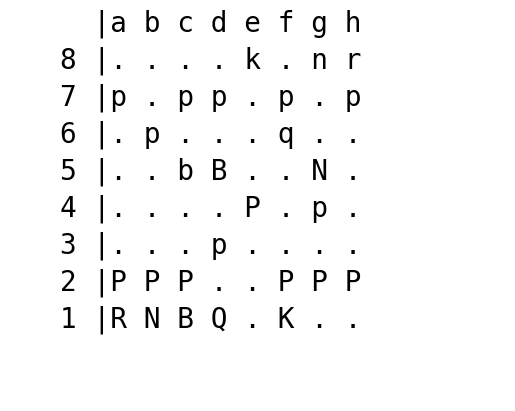

Computer move:  d5f7
. . . . k . n r
p . p p . B . p
. p . . . q . .
. . b . . . N .
. . . . P . p .
. . . p . . . .
P P P . . P P P
R N B Q . K . .


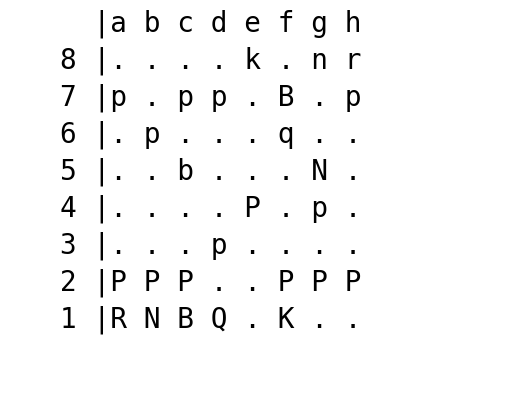

. . . k . . n r
p . p p . B . p
. p . . . q . .
. . b . . . N .
. . . . P . p .
. . . p . . . .
P P P . . P P P
R N B Q . K . .


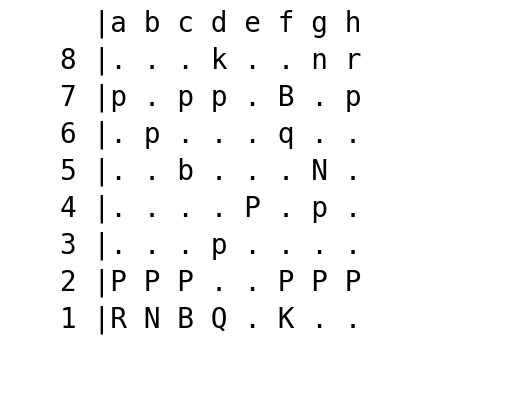

Computer move:  g5e6
. . . k . . n r
p . p p . B . p
. p . . N q . .
. . b . . . . .
. . . . P . p .
. . . p . . . .
P P P . . P P P
R N B Q . K . .


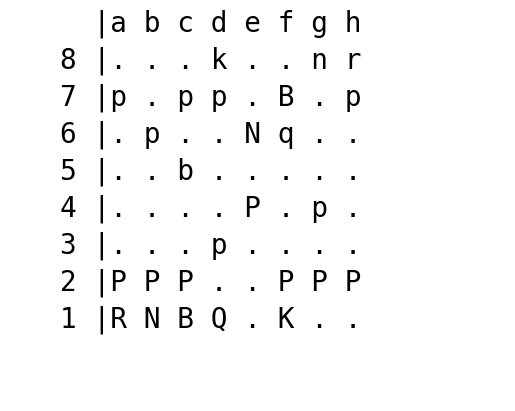

. . . k . . n r
p . p . . B . p
. p . . p q . .
. . b . . . . .
. . . . P . p .
. . . p . . . .
P P P . . P P P
R N B Q . K . .


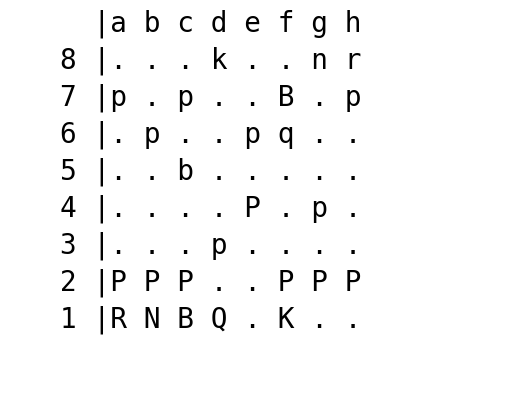

Computer move:  d1d3
. . . k . . n r
p . p . . B . p
. p . . p q . .
. . b . . . . .
. . . . P . p .
. . . Q . . . .
P P P . . P P P
R N B . . K . .


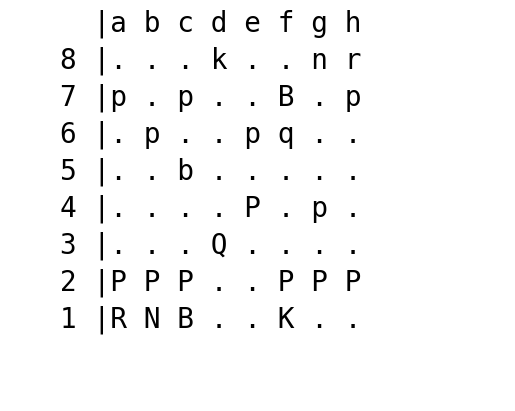

. . . k . . n r
p . p . . B . p
. p . . p q . .
. . . . . . . .
. . . b P . p .
. . . Q . . . .
P P P . . P P P
R N B . . K . .


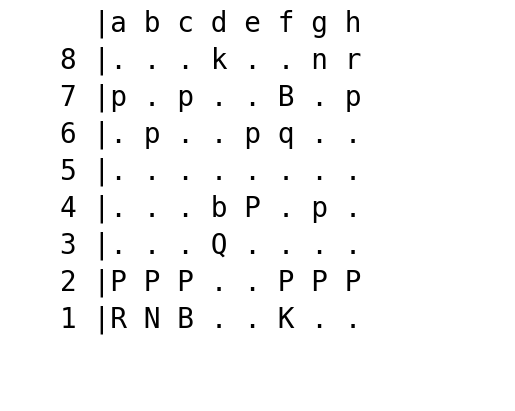

Computer move:  c1g5
. . . k . . n r
p . p . . B . p
. p . . p q . .
. . . . . . B .
. . . b P . p .
. . . Q . . . .
P P P . . P P P
R N . . . K . .


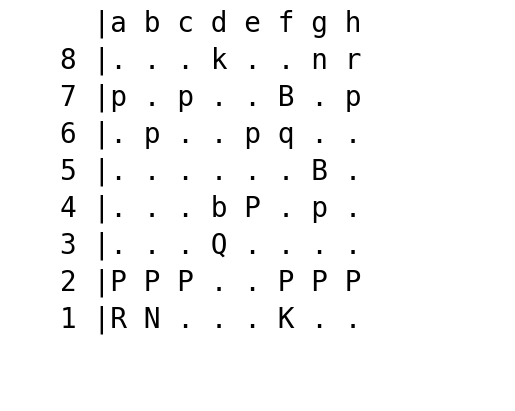

. . . k . . n r
p . p . . B . p
. p . . p . . .
. . . . . . q .
. . . b P . p .
. . . Q . . . .
P P P . . P P P
R N . . . K . .


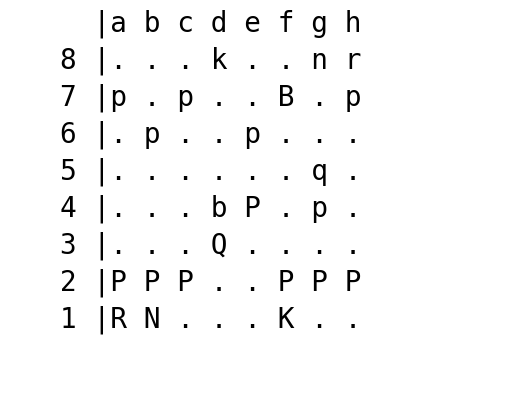

Computer move:  d3d4
. . . k . . n r
p . p . . B . p
. p . . p . . .
. . . . . . q .
. . . Q P . p .
. . . . . . . .
P P P . . P P P
R N . . . K . .


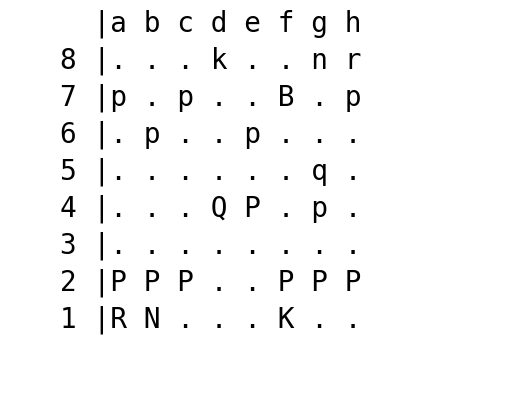

. . . . . . n r
p . p . k B . p
. p . . p . . .
. . . . . . q .
. . . Q P . p .
. . . . . . . .
P P P . . P P P
R N . . . K . .


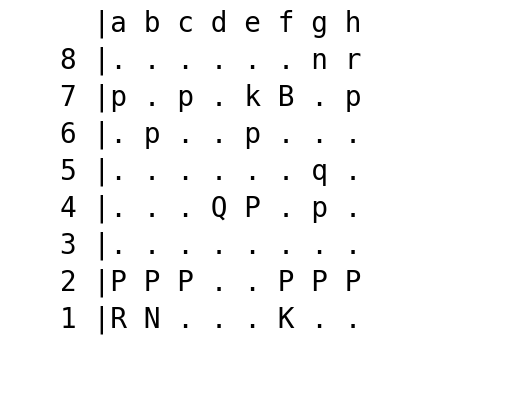

Computer move:  f7g8
. . . . . . B r
p . p . k . . p
. p . . p . . .
. . . . . . q .
. . . Q P . p .
. . . . . . . .
P P P . . P P P
R N . . . K . .


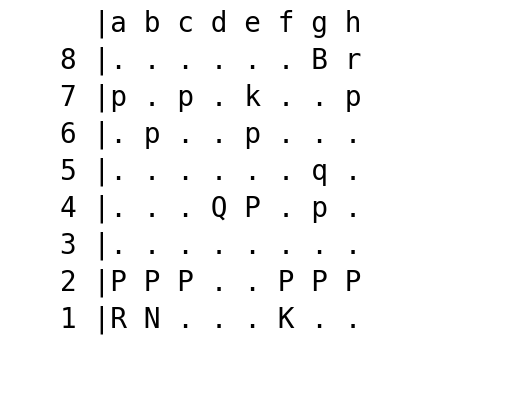

. . . . . . r .
p . p . k . . p
. p . . p . . .
. . . . . . q .
. . . Q P . p .
. . . . . . . .
P P P . . P P P
R N . . . K . .


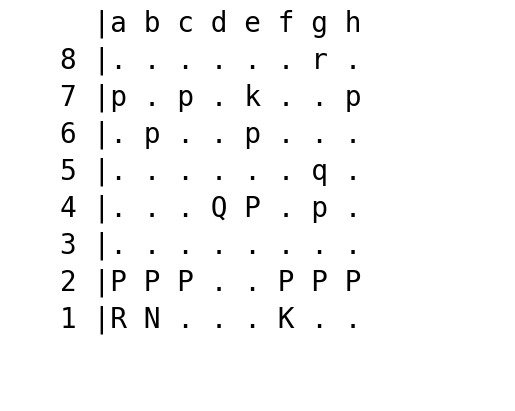

Computer move:  d4c3
. . . . . . r .
p . p . k . . p
. p . . p . . .
. . . . . . q .
. . . . P . p .
. . Q . . . . .
P P P . . P P P
R N . . . K . .


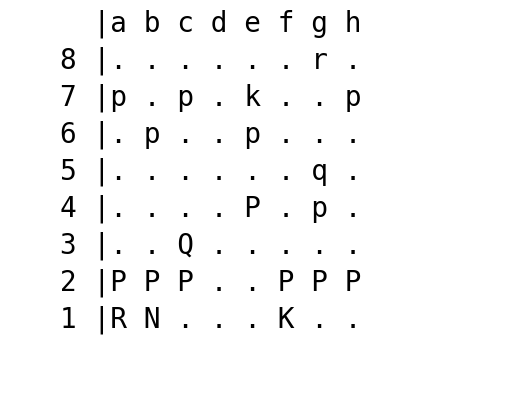

. . . . . . r .
p . p . k . . .
. p . . p . . .
. . . . . . q p
. . . . P . p .
. . Q . . . . .
P P P . . P P P
R N . . . K . .


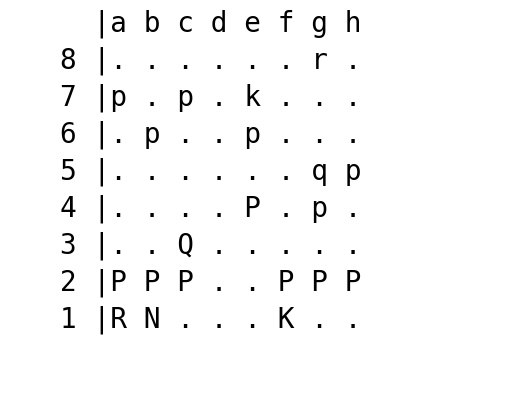

Computer move:  c3c7
. . . . . . r .
p . Q . k . . .
. p . . p . . .
. . . . . . q p
. . . . P . p .
. . . . . . . .
P P P . . P P P
R N . . . K . .


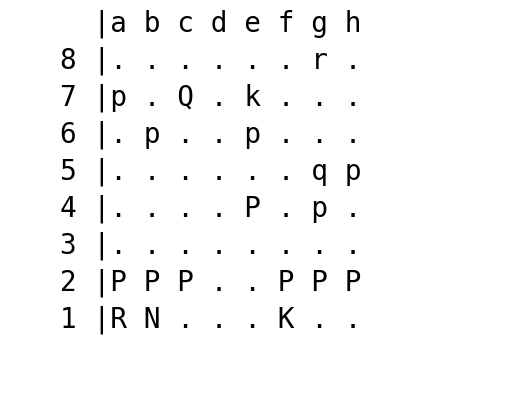

. . . . . . r .
p . Q . . . . .
. p . . p k . .
. . . . . . q p
. . . . P . p .
. . . . . . . .
P P P . . P P P
R N . . . K . .


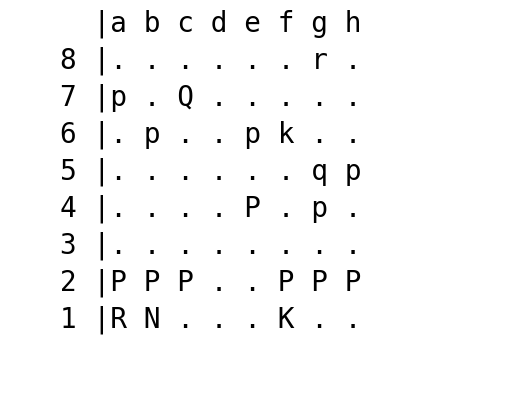

Computer move:  b1c3
. . . . . . r .
p . Q . . . . .
. p . . p k . .
. . . . . . q p
. . . . P . p .
. . N . . . . .
P P P . . P P P
R . . . . K . .


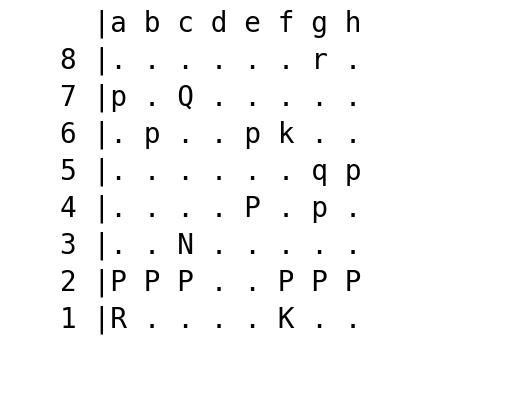

. . . . . . r .
p . Q . . . . .
. p . . p k . .
. . . . . . q .
. . . . P . p p
. . N . . . . .
P P P . . P P P
R . . . . K . .


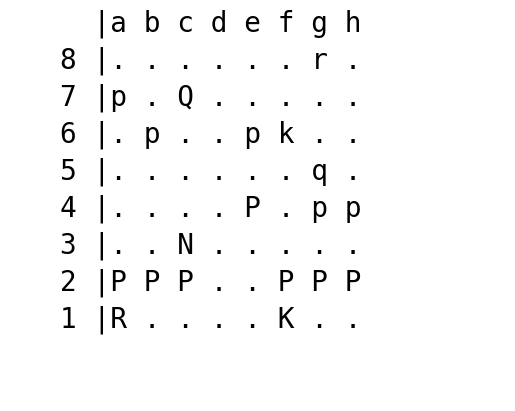

Computer move:  c7d7
. . . . . . r .
p . . Q . . . .
. p . . p k . .
. . . . . . q .
. . . . P . p p
. . N . . . . .
P P P . . P P P
R . . . . K . .


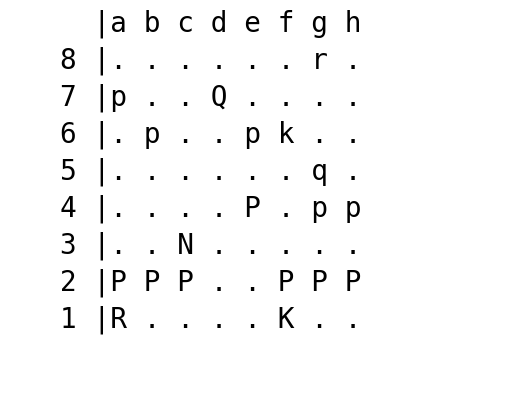

. . . . . . r .
p . . Q . . . .
. p . . p k . .
. . . . . . q .
. . . . P . . p
. . N . . . p .
P P P . . P P P
R . . . . K . .


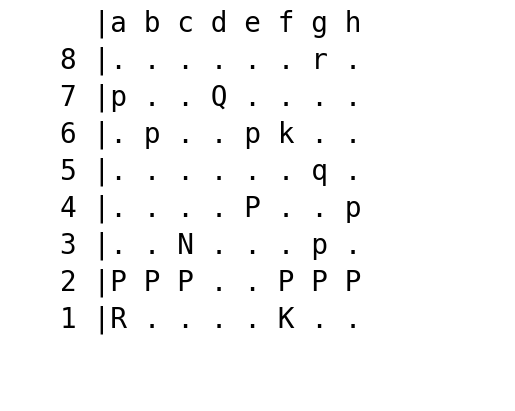

Computer move:  d7d4
. . . . . . r .
p . . . . . . .
. p . . p k . .
. . . . . . q .
. . . Q P . . p
. . N . . . p .
P P P . . P P P
R . . . . K . .


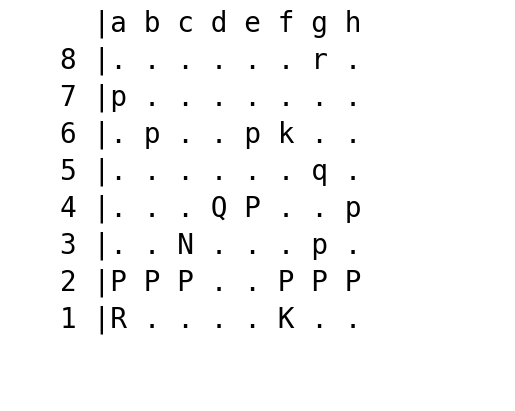

. . . . . . r .
p . . . . . . .
. p . . p . k .
. . . . . . q .
. . . Q P . . p
. . N . . . p .
P P P . . P P P
R . . . . K . .


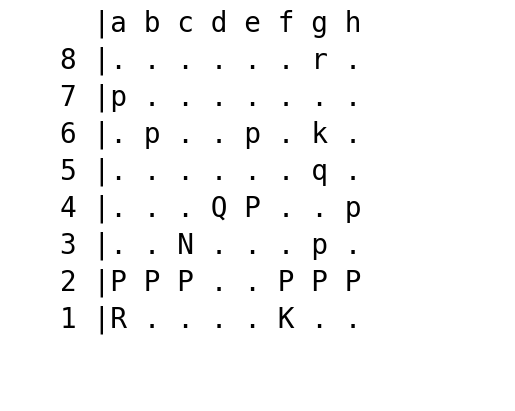

Computer move:  d4d7
. . . . . . r .
p . . Q . . . .
. p . . p . k .
. . . . . . q .
. . . . P . . p
. . N . . . p .
P P P . . P P P
R . . . . K . .


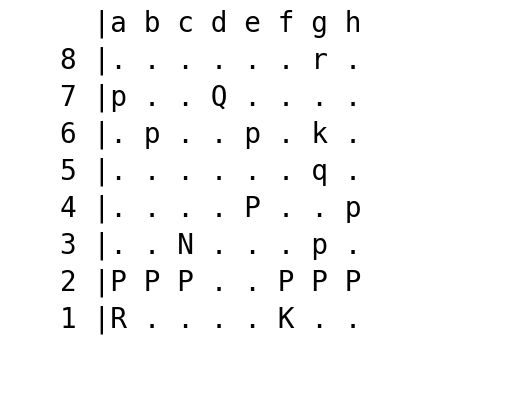

. . . . . . r .
p . . Q . . . .
. p . . p . k .
. . . . . . q .
. . . . P . . p
. . N . . . . .
P P P . . P P p
R . . . . K . .


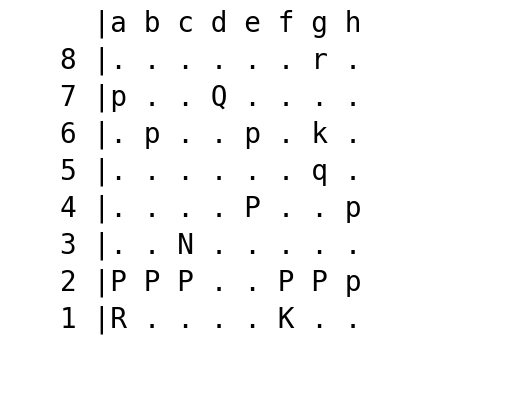

Computer move:  d7e6
. . . . . . r .
p . . . . . . .
. p . . Q . k .
. . . . . . q .
. . . . P . . p
. . N . . . . .
P P P . . P P p
R . . . . K . .


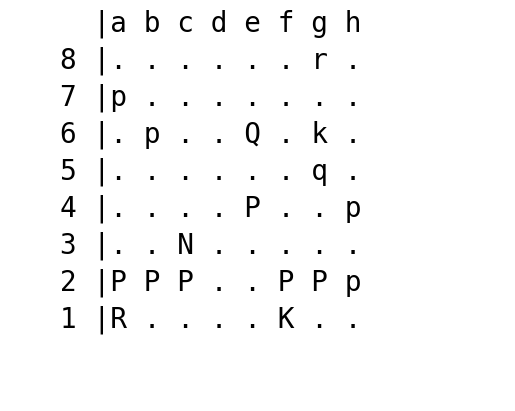

. . . . . . r .
p . . . . . . .
. p . . Q . . .
. . . . . . q k
. . . . P . . p
. . N . . . . .
P P P . . P P p
R . . . . K . .


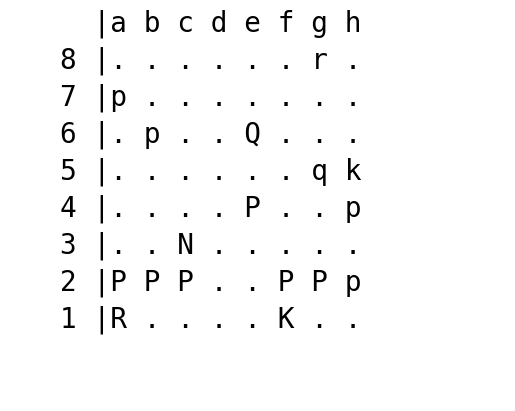

Computer move:  e6f7
. . . . . . r .
p . . . . Q . .
. p . . . . . .
. . . . . . q k
. . . . P . . p
. . N . . . . .
P P P . . P P p
R . . . . K . .


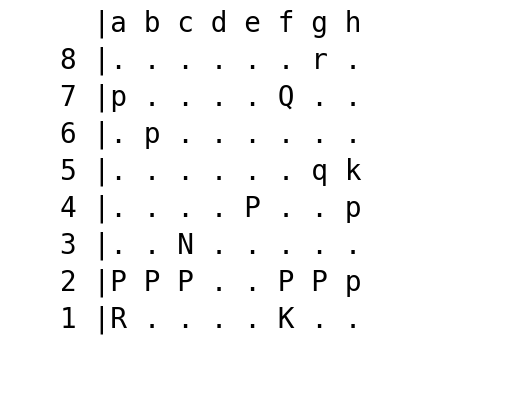

. . . . . . . .
p . . . . Q . .
. p . . . . r .
. . . . . . q k
. . . . P . . p
. . N . . . . .
P P P . . P P p
R . . . . K . .


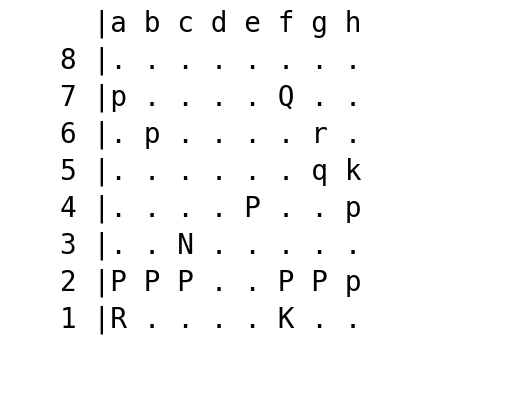

Computer move:  f7h7
. . . . . . . .
p . . . . . . Q
. p . . . . r .
. . . . . . q k
. . . . P . . p
. . N . . . . .
P P P . . P P p
R . . . . K . .


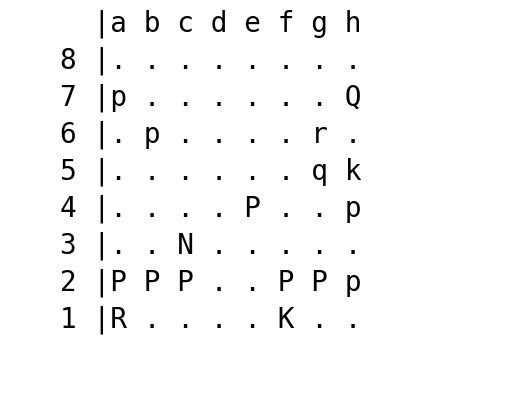

. . . . . . . .
p . . . . . . Q
. p . . . . r q
. . . . . . . k
. . . . P . . p
. . N . . . . .
P P P . . P P p
R . . . . K . .


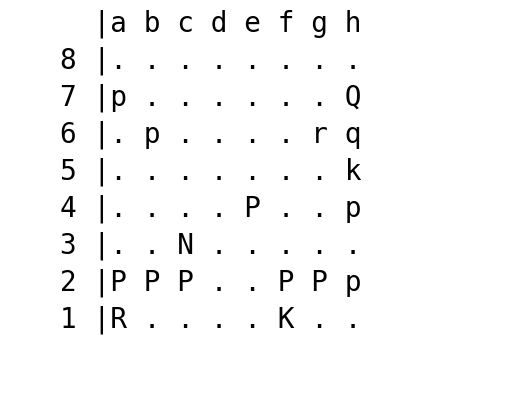

Computer move:  g2g4
. . . . . . . .
p . . . . . . Q
. p . . . . r q
. . . . . . . k
. . . . P . P p
. . N . . . . .
P P P . . P . p
R . . . . K . .


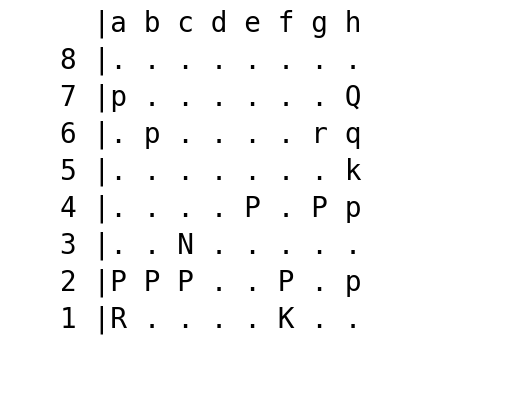

. . . . . . . .
p . . . . . . Q
. p . . . . . q
. . . . . . . k
. . . . P . r p
. . N . . . . .
P P P . . P . p
R . . . . K . .


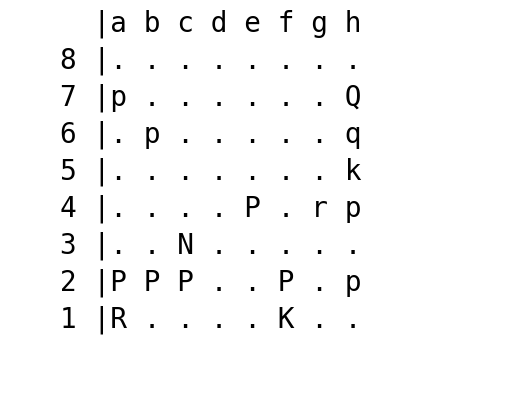

Computer move:  h7f7
. . . . . . . .
p . . . . Q . .
. p . . . . . q
. . . . . . . k
. . . . P . r p
. . N . . . . .
P P P . . P . p
R . . . . K . .


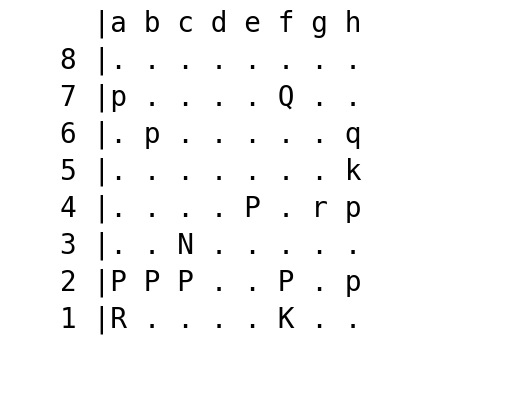

. . . . . . . .
p . . . . Q . .
. p . . . . q .
. . . . . . . k
. . . . P . r p
. . N . . . . .
P P P . . P . p
R . . . . K . .


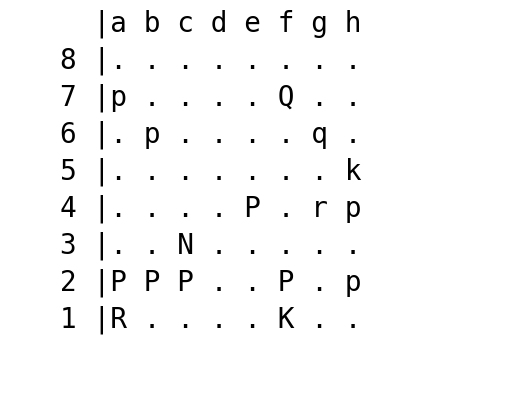

Computer move:  f7f3
. . . . . . . .
p . . . . . . .
. p . . . . q .
. . . . . . . k
. . . . P . r p
. . N . . Q . .
P P P . . P . p
R . . . . K . .


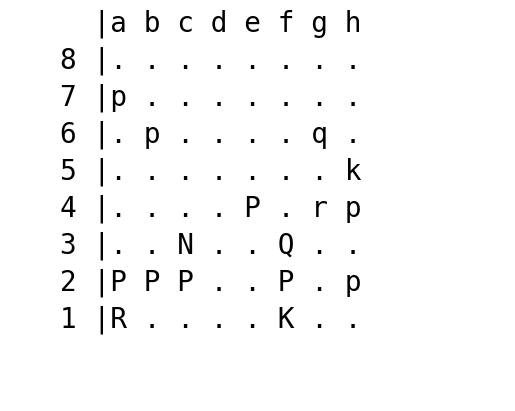

. . . . . . . .
p . . . . . . .
. p . . . . q k
. . . . . . . .
. . . . P . r p
. . N . . Q . .
P P P . . P . p
R . . . . K . .


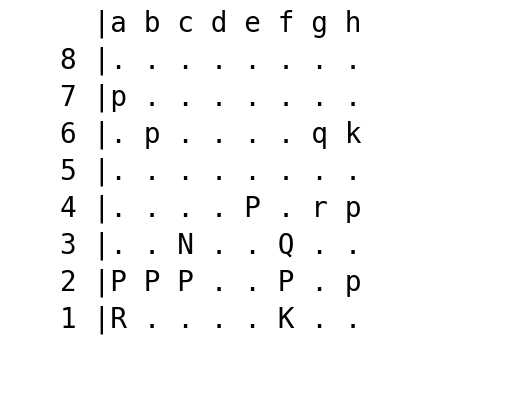

Computer move:  f3f8
. . . . . Q . .
p . . . . . . .
. p . . . . q k
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . p
R . . . . K . .


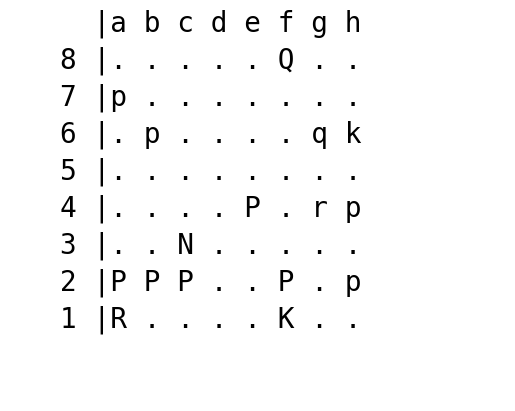

. . . . . Q . .
p . . . . . q .
. p . . . . . k
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . p
R . . . . K . .


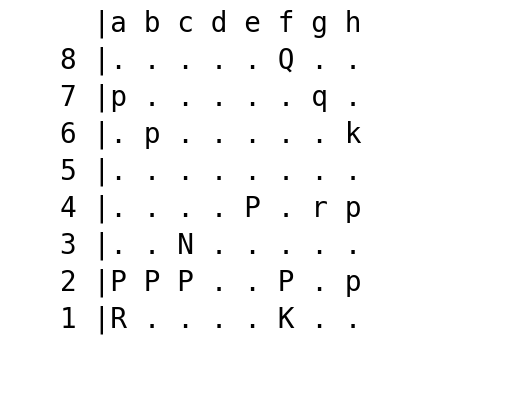

Computer move:  f8d6
. . . . . . . .
p . . . . . q .
. p . Q . . . k
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . p
R . . . . K . .


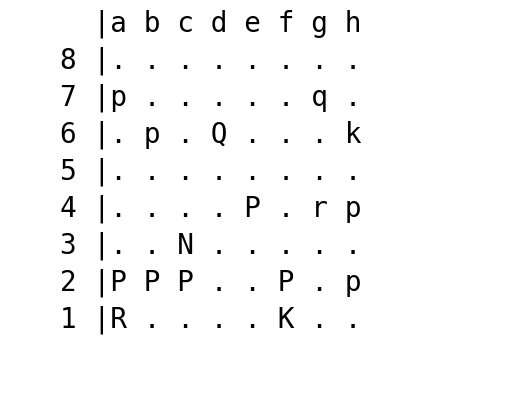

. . . . . . . .
p . . . . . q k
. p . Q . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . p
R . . . . K . .


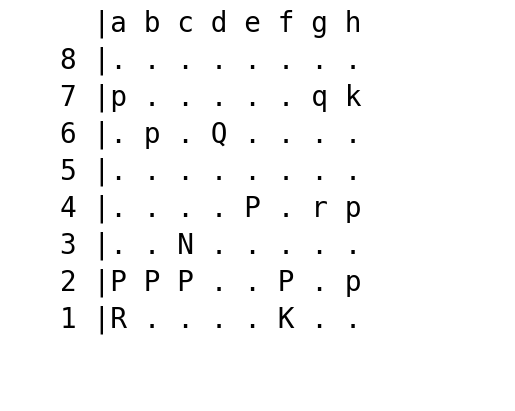

Computer move:  d6h2
. . . . . . . .
p . . . . . q k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . Q
R . . . . K . .


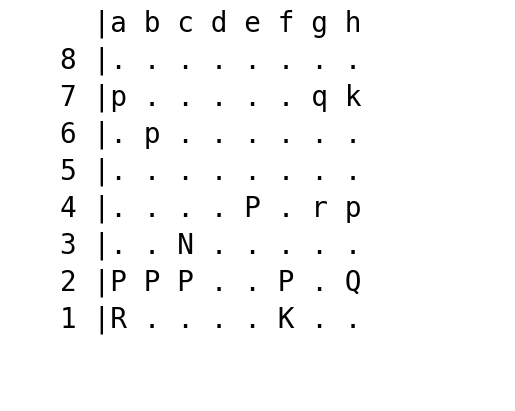

. . . . . . . .
p . . q . . . k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . Q
R . . . . K . .


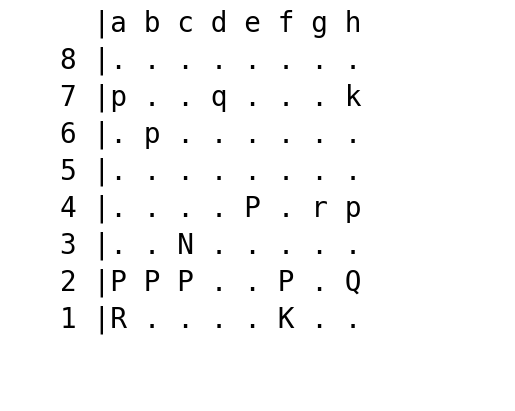

Computer move:  h2b8
. Q . . . . . .
p . . q . . . k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . .
R . . . . K . .


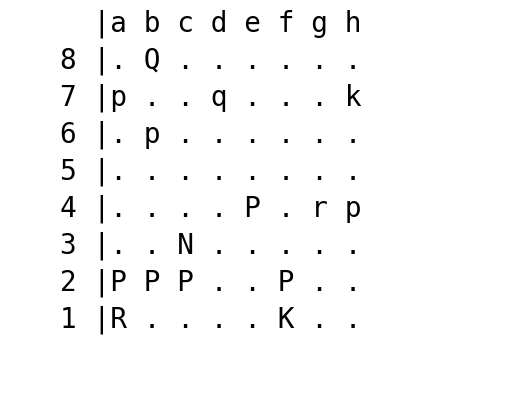

. Q . . . . . .
p . . . . . q k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . .
R . . . . K . .


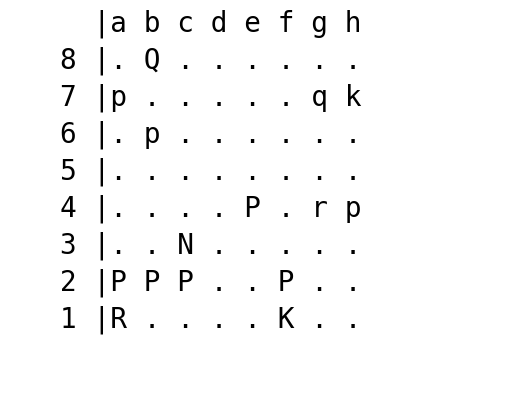

Computer move:  b8h2
. . . . . . . .
p . . . . . q k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . Q
R . . . . K . .


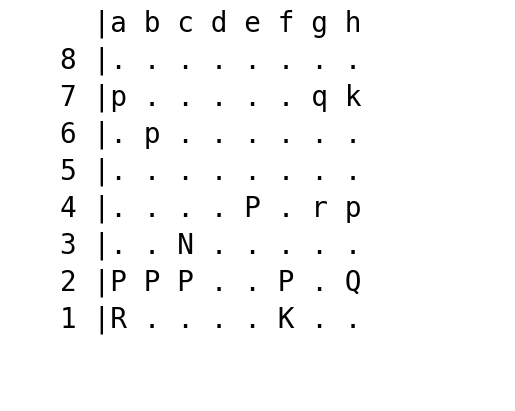

. . . . . . . .
p . . . . q . k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . . P . Q
R . . . . K . .


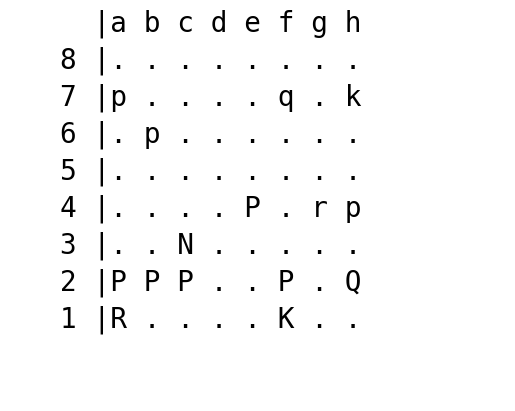

Computer move:  f1e2
. . . . . . . .
p . . . . q . k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . K P . Q
R . . . . . . .


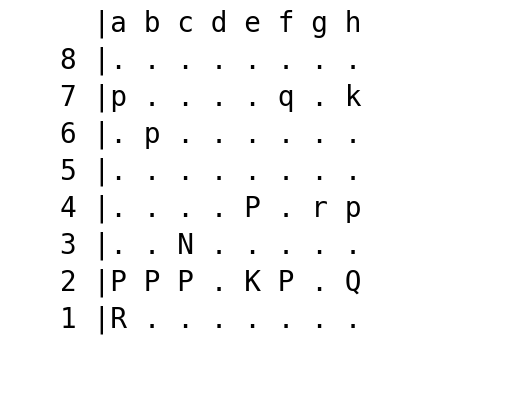

. . . . . . . .
p . . . . . . k
. p . . . . . .
. . . . . . . .
. . q . P . r p
. . N . . . . .
P P P . K P . Q
R . . . . . . .


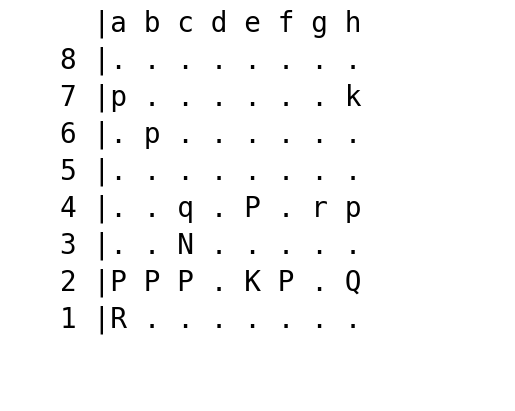

Computer move:  e2f3
. . . . . . . .
p . . . . . . k
. p . . . . . .
. . . . . . . .
. . q . P . r p
. . N . . K . .
P P P . . P . Q
R . . . . . . .


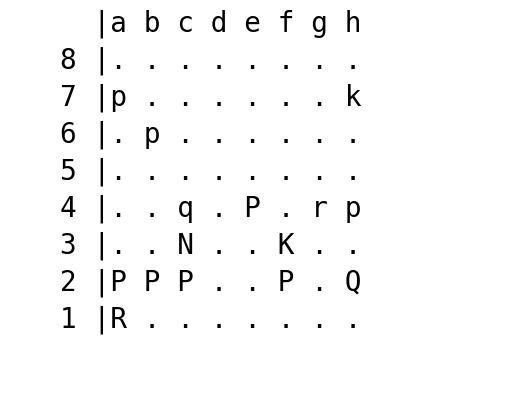

. . . . . . q .
p . . . . . . k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . K . .
P P P . . P . Q
R . . . . . . .


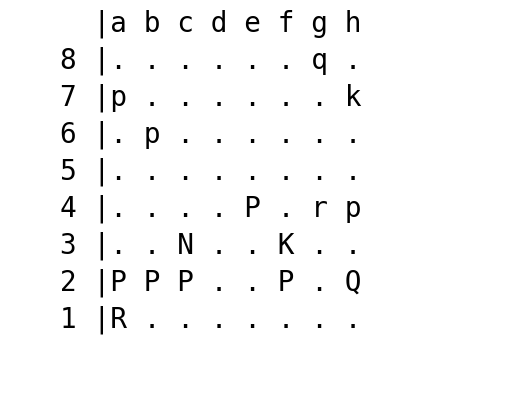

Computer move:  f3e3
. . . . . . q .
p . . . . . . k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . K . . .
P P P . . P . Q
R . . . . . . .


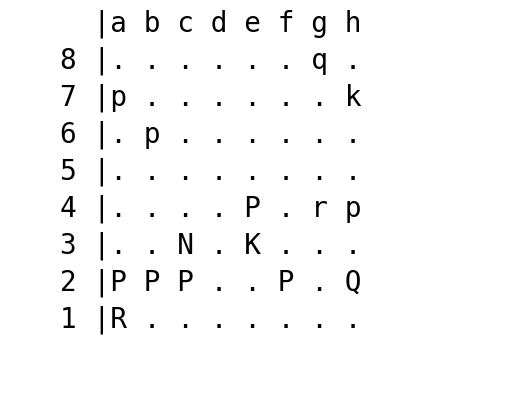

. . . . . . . .
p . . . . . . k
. p . . . . . .
. . . . . . q .
. . . . P . r p
. . N . K . . .
P P P . . P . Q
R . . . . . . .


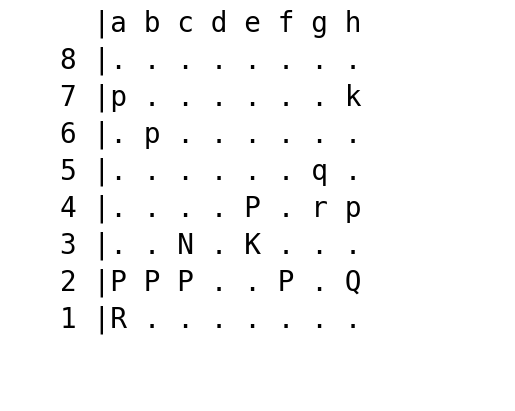

Computer move:  e3e2
. . . . . . . .
p . . . . . . k
. p . . . . . .
. . . . . . q .
. . . . P . r p
. . N . . . . .
P P P . K P . Q
R . . . . . . .


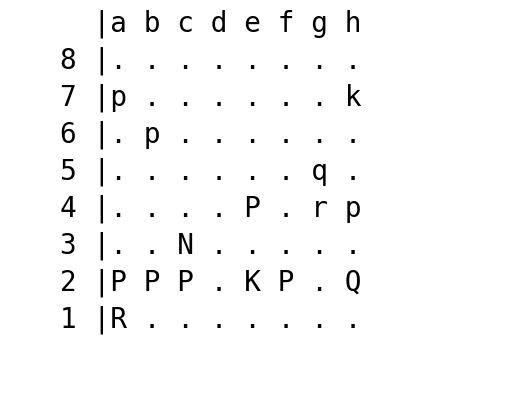

. . . . . . . .
p . . . q . . k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . K P . Q
R . . . . . . .


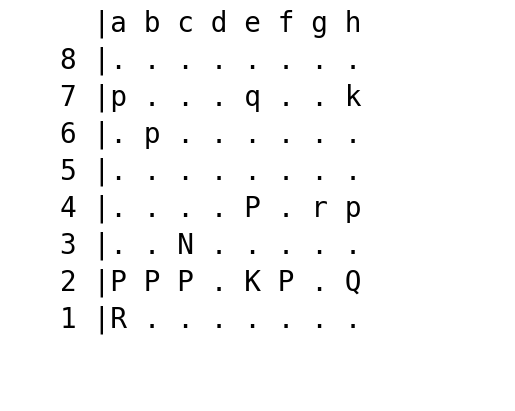

Computer move:  h2h1
. . . . . . . .
p . . . q . . k
. p . . . . . .
. . . . . . . .
. . . . P . r p
. . N . . . . .
P P P . K P . .
R . . . . . . Q


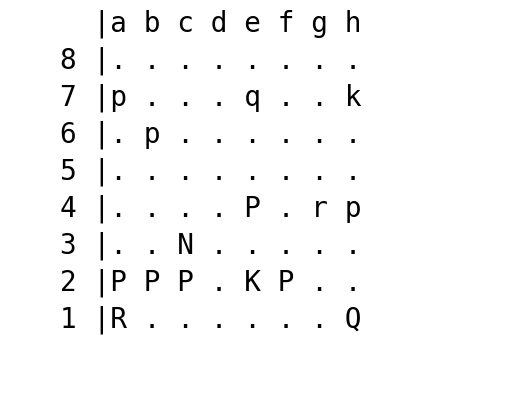

. . . . . . . .
p . . . . . . k
. p . . . . . .
. . . . . . . .
. q . . P . r p
. . N . . . . .
P P P . K P . .
R . . . . . . Q


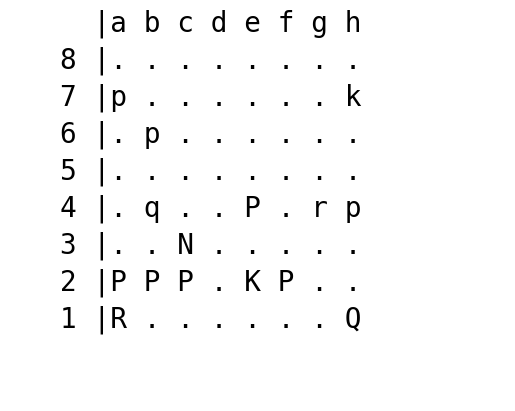

Computer move:  a1b1
. . . . . . . .
p . . . . . . k
. p . . . . . .
. . . . . . . .
. q . . P . r p
. . N . . . . .
P P P . K P . .
. R . . . . . Q


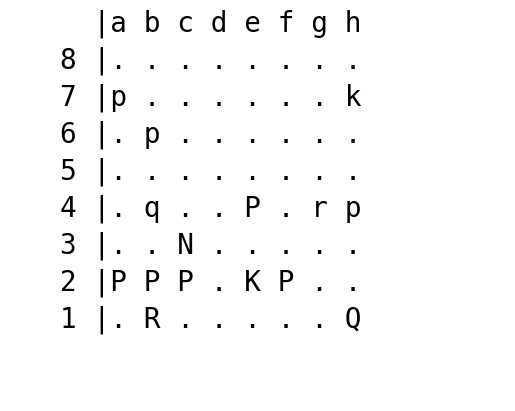

. . . . . . . .
p . . . . . . k
. p . . . . . .
. . . . . . . .
. . q . P . r p
. . N . . . . .
P P P . K P . .
. R . . . . . Q


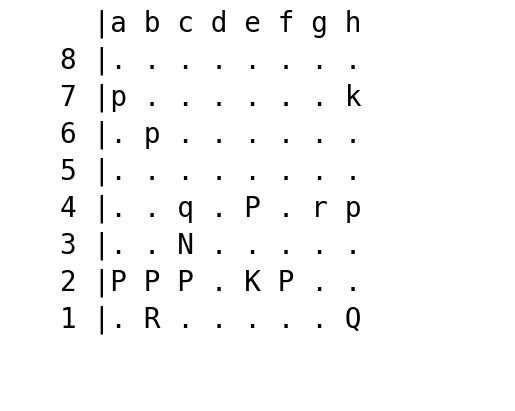

Computer move:  e2f3
. . . . . . . .
p . . . . . . k
. p . . . . . .
. . . . . . . .
. . q . P . r p
. . N . . K . .
P P P . . P . .
. R . . . . . Q


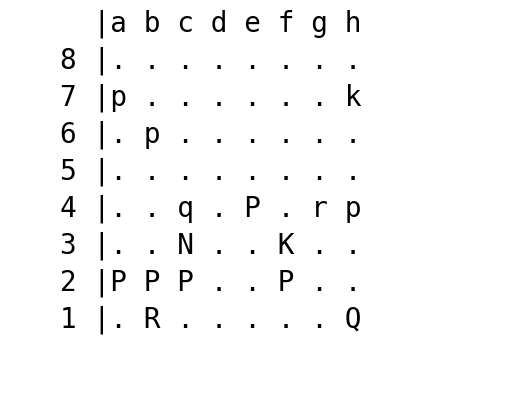

. . . . . . . .
p . . . . . . k
. p . . q . . .
. . . . . . . .
. . . . P . r p
. . N . . K . .
P P P . . P . .
. R . . . . . Q


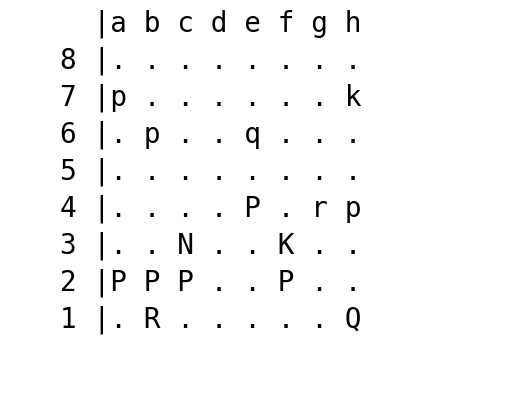

Computer move:  f3e3
. . . . . . . .
p . . . . . . k
. p . . q . . .
. . . . . . . .
. . . . P . r p
. . N . K . . .
P P P . . P . .
. R . . . . . Q


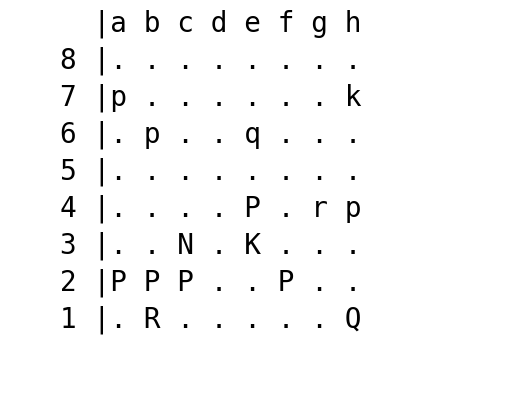

InvalidMoveError: expected uci string to be of length 4 or 5: ''

In [20]:
play_chess_gui()